# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [29]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
app_train.loc[app_train["DAYS_EMPLOYED"] == 365243,"DAYS_EMPLOYED"].head()

8     365243
11    365243
23    365243
38    365243
43    365243
Name: DAYS_EMPLOYED, dtype: int64

In [4]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = False)

0         -637.0
1        -1188.0
2         -225.0
3        -3039.0
4        -3038.0
5        -1588.0
6        -3130.0
7         -449.0
8            NaN
9        -2019.0
10        -679.0
11           NaN
12       -2717.0
13       -3028.0
14        -203.0
15       -1157.0
16       -1317.0
17        -191.0
18       -7804.0
19       -2038.0
20       -4286.0
21       -1652.0
22       -4306.0
23           NaN
24        -746.0
25       -3494.0
26       -2628.0
27       -1234.0
28       -1796.0
29       -1010.0
           ...  
307481   -3147.0
307482    -226.0
307483       NaN
307484    -328.0
307485    -670.0
307486   -1185.0
307487       NaN
307488   -1218.0
307489    -286.0
307490   -1928.0
307491   -1953.0
307492   -1618.0
307493   -2306.0
307494   -6573.0
307495   -7438.0
307496   -2178.0
307497   -1222.0
307498   -3689.0
307499   -8694.0
307500   -5326.0
307501   -1046.0
307502   -8736.0
307503    -399.0
307504   -7258.0
307505       NaN
307506    -236.0
307507       NaN
307508   -7921

In [5]:
app_train['DAYS_EMPLOYED'].replace(365243,np.nan)
app_train['DAYS_EMPLOYED']

0           -637
1          -1188
2           -225
3          -3039
4          -3038
5          -1588
6          -3130
7           -449
8         365243
9          -2019
10          -679
11        365243
12         -2717
13         -3028
14          -203
15         -1157
16         -1317
17          -191
18         -7804
19         -2038
20         -4286
21         -1652
22         -4306
23        365243
24          -746
25         -3494
26         -2628
27         -1234
28         -1796
29         -1010
           ...  
307481     -3147
307482      -226
307483    365243
307484      -328
307485      -670
307486     -1185
307487    365243
307488     -1218
307489      -286
307490     -1928
307491     -1953
307492     -1618
307493     -2306
307494     -6573
307495     -7438
307496     -2178
307497     -1222
307498     -3689
307499     -8694
307500     -5326
307501     -1046
307502     -8736
307503      -399
307504     -7258
307505    365243
307506      -236
307507    365243
307508     -79

In [6]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

0         (572.198, 932.264]
1         (932.264, 1292.33]
2         (210.332, 572.198]
3         (210.332, 572.198]
4         (572.198, 932.264]
5         (572.198, 932.264]
6         (932.264, 1292.33]
7         (932.264, 1292.33]
8         (932.264, 1292.33]
9         (572.198, 932.264]
10        (572.198, 932.264]
11        (210.332, 572.198]
12        (210.332, 572.198]
13        (932.264, 1292.33]
14        (572.198, 932.264]
15        (210.332, 572.198]
16        (572.198, 932.264]
17        (210.332, 572.198]
18        (210.332, 572.198]
19        (572.198, 932.264]
20        (572.198, 932.264]
21        (932.264, 1292.33]
22        (572.198, 932.264]
23        (210.332, 572.198]
24        (210.332, 572.198]
25        (210.332, 572.198]
26        (932.264, 1292.33]
27        (210.332, 572.198]
28        (572.198, 932.264]
29        (210.332, 572.198]
                 ...        
307481    (210.332, 572.198]
307482    (572.198, 932.264]
307483    (210.332, 572.198]
307484    (572

(array([1.9859e+04, 8.0649e+04, 7.4691e+04, 6.5047e+04, 4.1854e+04,
        1.9353e+04, 4.9540e+03, 1.0600e+03, 2.6000e+01, 1.8000e+01]),
 array([ 212.13203436,  392.1649489 ,  572.19786343,  752.23077797,
         932.26369251, 1112.29660705, 1292.32952159, 1472.36243613,
        1652.39535067, 1832.42826521, 2012.46117975]),
 <a list of 10 Patch objects>)

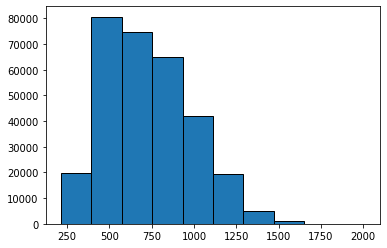

In [50]:
credit_data=app_train.loc[:,['AMT_CREDIT',"TARGET"]]
#credit_data['NEW_AMT_CREDIT']=credit_data['AMT_CREDIT']**0.5

#credit_data['NEW_AMT_CREDIT']=pd.cut(credit_data['NEW_AMT_CREDIT'],bins=5)
#print(credit_data['NEW_AMT_CREDIT'])
#credit_data['NEW_AMT_CREDIT'].value_counts()

plt.hist(credit_data['AMT_CREDIT']**0.5,edgecolor = 'k',bins=10)
